<a href="https://colab.research.google.com/github/martinalegre77/data_analytics/blob/main/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***testing***

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [76]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/main/fcc-forum-pageviews.csv',
                 parse_dates=[0],
                 index_col=0)

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [77]:
# Clean data
df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


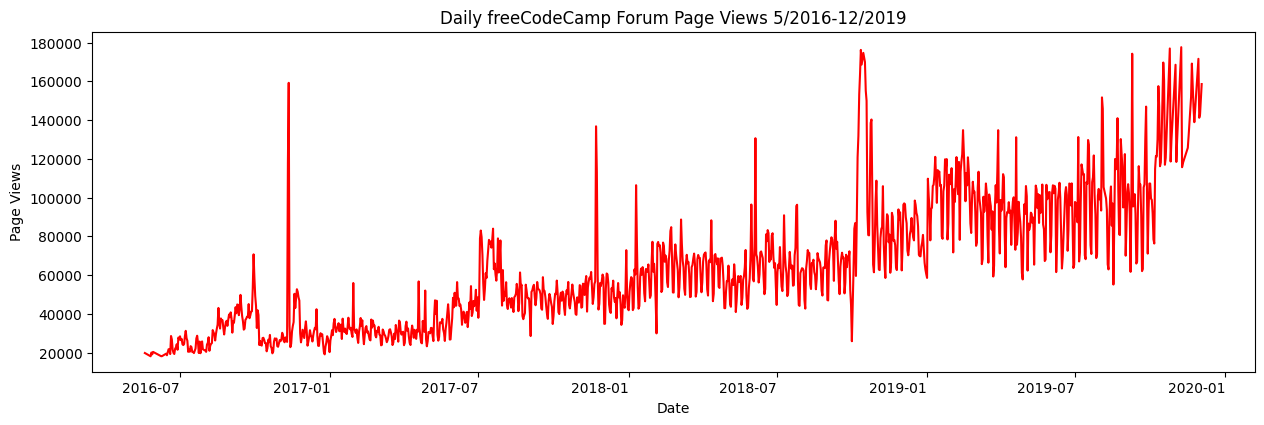

In [78]:
# Draw line plot
fig = df.plot.line(figsize=(15,5), color='red', legend=False)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.xticks(rotation = 0)
plt.ylabel('Page Views')
fig = fig.figure

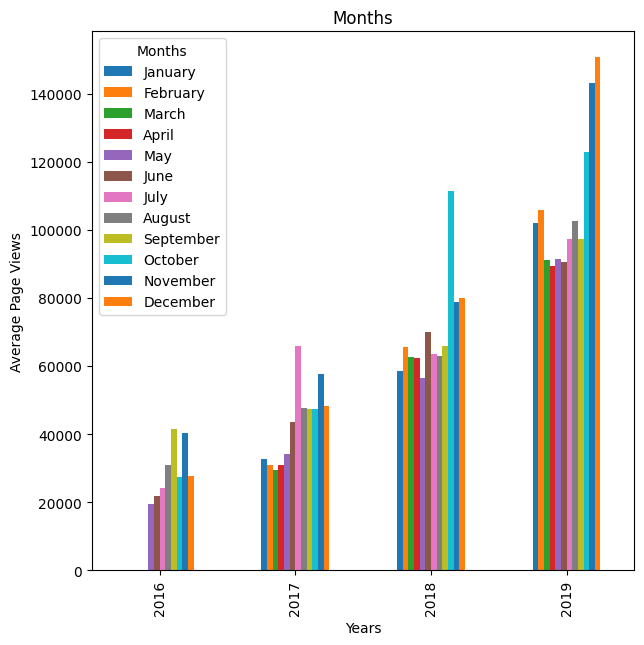

In [85]:
# draw_bar_plot
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['years'] = df_bar.index.year
df_bar['month'] = df_bar.index.month_name()
df_bar = df_bar.groupby(["years", "month"])["value"].mean().round()
df_bar = df_bar.unstack(level='month')
df_bar = df_bar[
    ['January', 'February', 'March', 'April',
     'May', 'June', 'July', 'August',
     'September', 'October', 'November', 'December']
    ]

# Draw bar plot
fig = df_bar.plot.bar(figsize=(7,7))
plt.title('Months')
plt.legend(title='Months')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
fig = fig.figure

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

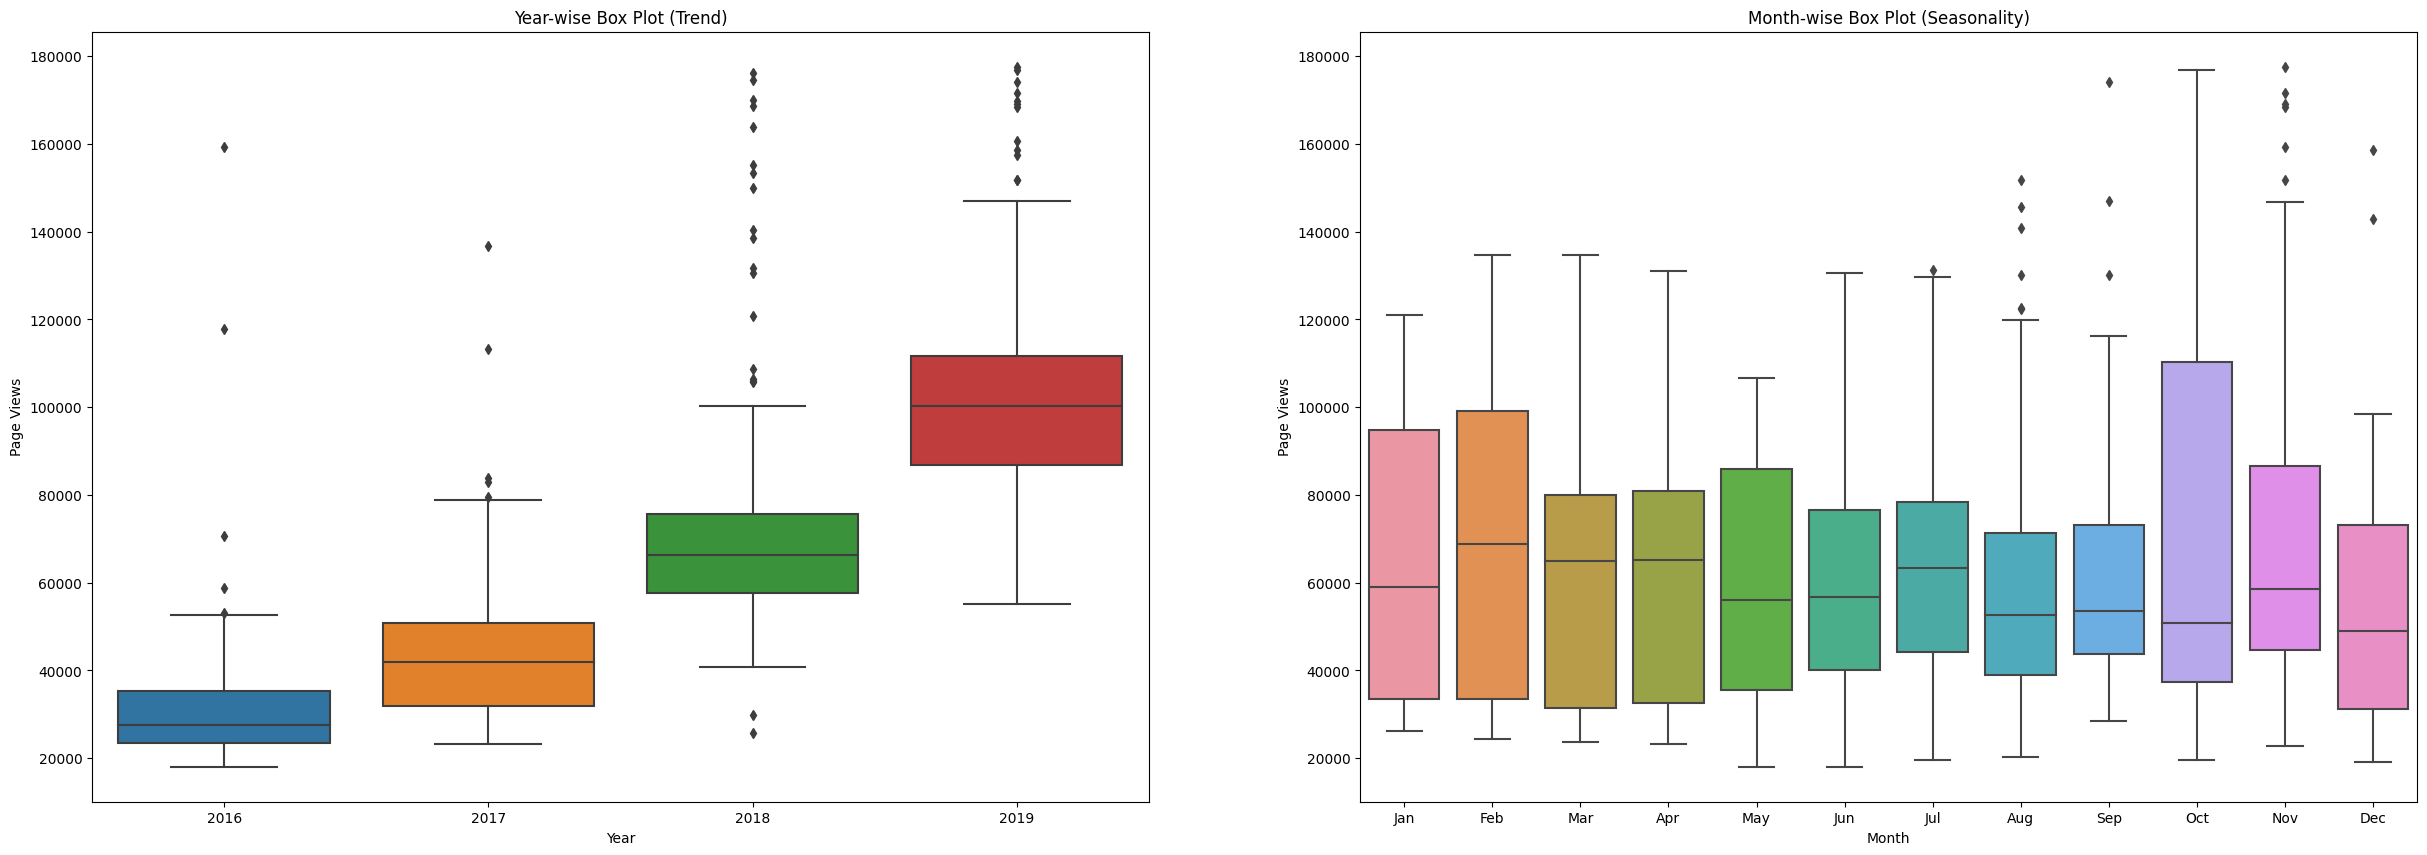

In [86]:
# draw_box_plot():
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
mon_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
ax2 = sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order);
ax1.set_ylabel('Page Views')
ax1.set_xlabel('Year')
ax1.set_title('Year-wise Box Plot (Trend)')
ax2.set_ylabel('Page Views')
ax2.set_xlabel('Month')
ax2.set_title('Month-wise Box Plot (Seasonality)')

# ***time_series_visualizer.py***

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col=0)

# Clean data
df = df[
       (df['value'] >= df['value'].quantile(0.025)) &
       (df['value'] <= df['value'].quantile(0.0975))
       ]

def draw_line_plot():
    # Draw line plot
    fig = df.plot.line(figsize=(15,5), color='red', legend=False)
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.xticks(rotation = 0)
    plt.ylabel('Page Views')
    fig = fig.figure

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['years'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar = df_bar.groupby(["years", "month"])["value"].mean().round()
    df_bar = df_bar.unstack(level='month')
    df_bar = df_bar[
                  ['January', 'February', 'March', 'April',
                   'May', 'June', 'July', 'August',
                   'September', 'October', 'November', 'December']
                  ]

    # Draw bar plot
    fig = df_bar.plot.bar(figsize=(7,7))
    plt.title('Months')
    plt.legend(title='Months')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    fig = fig.figure

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    mon_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
    ]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
    ax1 = sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
    ax2 = sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=mon_order);
    ax1.set_ylabel('Page Views')
    ax1.set_xlabel('Year')
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

#**MAIN**

In [ ]:
# This entrypoint file to be used in development. Start by reading README.md
import time_series_visualizer
from unittest import main

# Test your function by calling it here
time_series_visualizer.draw_line_plot()
time_series_visualizer.draw_bar_plot()
time_series_visualizer.draw_box_plot()

# Run unit tests automatically
main(module='test_module', exit=False)

# **TEST MODULE**

In [ ]:
import time_series_visualizer
import matplotlib as mpl

class DataCleaningTestCase(unittest.TestCase):
    def test_data_cleaning(self):
        actual = int(time_series_visualizer.df.count(numeric_only=True))
        expected = 1238
        self.assertEqual(actual, expected, "Expected DataFrame count after cleaning to be 1238.")

class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_line_plot()
        self.ax = self.fig.axes[0]

    def test_line_plot_title(self):
        actual = self.ax.get_title()
        expected = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
        self.assertEqual(actual, expected, "Expected line plot title to be 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'")

    def test_line_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Date"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Date'")
        actual = self.ax.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Page Views'")

    def test_line_plot_data_quantity(self):
        actual = len(self.ax.lines[0].get_ydata())
        expected = 1238
        self.assertEqual(actual, expected, "Expected number of data points in line plot to be 1238.")


class BarPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_bar_plot()
        self.ax = self.fig.axes[0]

    def test_bar_plot_legend_labels(self):
        actual = []
        for label in self.ax.get_legend().get_texts():
          actual.append(label.get_text())
        expected = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
        self.assertEqual(actual, expected, "Expected bar plot legend labels to be months of the year.")

    def test_bar_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Years"
        self.assertEqual(actual, expected, "Expected bar plot xlabel to be 'Years'")
        actual = self.ax.get_ylabel()
        expected = "Average Page Views"
        self.assertEqual(actual, expected, "Expected bar plot ylabel to be 'Average Page Views'")
        actual = []
        for label in self.ax.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected bar plot secondary labels to be '2016', '2017', '2018', '2019'")

    def test_bar_plot_number_of_bars(self):
        actual = len([rect for rect in self.ax.get_children() if isinstance(rect, mpl.patches.Rectangle)])
        expected = 49
        self.assertEqual(actual, expected, "Expected a different number of bars in bar chart.")


class BoxPlotTestCase(unittest.TestCase):
    def setUp(self):
        self.fig = time_series_visualizer.draw_box_plot()
        self.ax1 = self.fig.axes[0]
        self.ax2 = self.fig.axes[1]

    def test_box_plot_number(self):
        actual = len(self.fig.get_axes())
        expected = 2
        self.assertEqual(actual, expected, "Expected two box plots in figure.")

    def test_box_plot_labels(self):
        actual = self.ax1.get_xlabel()
        expected = "Year"
        self.assertEqual(actual, expected, "Expected box plot 1 xlabel to be 'Year'")
        actual = self.ax1.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 1 ylabel to be 'Page Views'")
        actual = self.ax2.get_xlabel()
        expected = "Month"
        self.assertEqual(actual, expected, "Expected box plot 2 xlabel to be 'Month'")
        actual = self.ax2.get_ylabel()
        expected = "Page Views"
        self.assertEqual(actual, expected, "Expected box plot 2 ylabel to be 'Page Views'")
        actual = []
        for label in self.ax1.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['2016', '2017', '2018', '2019']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '2016', '2017', '2018', '2019'")
        actual = []
        for label in self.ax2.get_xaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
        self.assertEqual(actual, expected, "Expected box plot 2 secondary labels to be 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'")
        actual = []
        for label in self.ax1.get_yaxis().get_majorticklabels():
            actual.append(label.get_text())
        expected = ['0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000']
        self.assertEqual(actual, expected, "Expected box plot 1 secondary labels to be '0', '20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000', '180000', '200000'")

    def test_box_plot_titles(self):
        actual = self.ax1.get_title()
        expected = "Year-wise Box Plot (Trend)"
        self.assertEqual(actual, expected, "Expected box plot 1 title to be 'Year-wise Box Plot (Trend)'")
        actual = self.ax2.get_title()
        expected = "Month-wise Box Plot (Seasonality)"
        self.assertEqual(actual, expected, "Expected box plot 2 title to be 'Month-wise Box Plot (Seasonality)'")

    def test_box_plot_number_of_boxes(self):
        actual = len(self.ax1.lines) / 6 # Every box has 6 lines
        expected = 4
        self.assertEqual(actual, expected, "Expected four boxes in box plot 1")
        actual = len(self.ax2.lines) / 6 # Every box has 6 lines
        expected = 12
        self.assertEqual(actual, expected, "Expected 12 boxes in box plot 2")

if __name__ == "__main__":
    unittest.main()